# Basic Monte Carlo techniques
## The photon gas

The average occupancy number of state $j$ of the photon gas ($\left\langle n_{j}\right\rangle$) can be calculated analytically.
From quantum mechanics we know that the total energy of the system ($U$) can be written as the sum of energies of harmonic oscillators:

\begin{equation}
U = \sum_{j=1}^{N} n_{j}\omega_{j}\hbar = \sum_{j=1}^{N}
n_{j}\epsilon_{j}
\end{equation}

in which $\epsilon_{j}$ is the characteristic energy of oscillator $j$, $n_{j} = 0,1,2,\cdots,\infty$ is the so called occupancy number of oscillator $j$, $N$ is the number of oscillators, $\omega$ the  requency, and $2\pi\hbar$ Planck's constant.

In this exercise we are going to compute this quantity, for one oscillator, using a Monte Carlo scheme.
We will use the following procedure to calculate $\left\langle
n_{j}\right\rangle$:

1. Start with an arbitrary $n_{j}$
1. Decide to perform a trial move to randomly increase or decrease
$n_{j}$ by $1$.
1. Accept the trial move with probability
\begin{equation}
{\rm acc} \left({\rm o}\rightarrow{\rm n}\right) = {\rm min} \left(1,
\exp\left[-\beta \left(U\left({\rm n}\right) - U\left({\rm
o}\right)\right)\right]\right)
\end{equation}
Of course $n_j$ cannot become negative!


1. How can this scheme obey detailed balance when $n_{j}=0$?
After all, $n_{j}$ cannot become negative!

reject all the trial moves that would lead to negative occupancy numbers.

2. Is the algorithm still correct when trial moves are performed that change $n_j$ with a random integer from the interval $\left[-5,5\right]$?
What happens when only trial moves are performed that change $n_j$ with either $-3$ or $+3$?

right, but low efficiency

3. Assume that $N=1$ and $\epsilon_{j}=\epsilon$.
Implement a Monte Carlo simulation to calculate $\left\langle n_{j}\right\rangle$ as a function of
$\beta\epsilon$.
Compare your result with the analytical solution:
\begin{equation}
\langle n \rangle = \frac{1}{e^{\beta \epsilon}-1}
\end{equation}

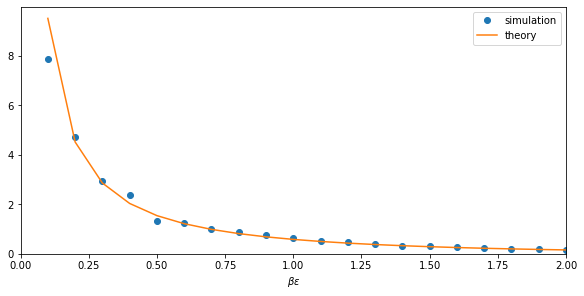

In [4]:
import numpy as np
from numpy import exp
from numpy.random import rand


def photon_gas_monte_carlo(initial_energy: float, cycles: int, beta: float) -> float:
    """
    Run a NVT MC simulation of the photon gas.
    Return the average energy.
    """
    average_energy = initial_energy
    for _ in range(cycles):
        # trial move +-1
        if rand() < 0.5:
            trial_energy = initial_energy + 1
        else:
            trial_energy = initial_energy - 1
        # Metropolis acceptance criterion
        if trial_energy>=0 and rand() < exp(-beta * (trial_energy - initial_energy)):
            initial_energy = trial_energy
        # Update the average energy
        average_energy += initial_energy    
    return average_energy/cycles


def main():
    import matplotlib.pyplot as plt

    initial_energy = 10
    monte_carlo_cycles = 10000
    
    beta_min, beta_max = 0.1, 2.0
    betas = np.linspace(beta_min, beta_max, 20)
    average_energies = np.zeros_like(betas)

    for (i, beta) in enumerate(betas):
        average_energies[i] = photon_gas_monte_carlo(initial_energy, cycles=monte_carlo_cycles, beta=beta)

    fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
    ax.set_xlabel(r"$\beta\epsilon$")
    ax.plot(betas, average_energies, 'o', label="simulation")

    # Theoretical prediction
    theoretical_energies = 1/(exp(betas) - 1)
    ax.plot(betas, theoretical_energies, label="theory")
    
    ax.set_xlim(0, beta_max)
    ax.set_ylim(0, None)
    ax.legend()
    plt.show()


if __name__ == "__main__":
    main()

4. Modify the program in such a way that the averages are updated only after an accepted trial move. Why does this lead to erroneous results? At which values of $\beta$ does this error become more pronounced?

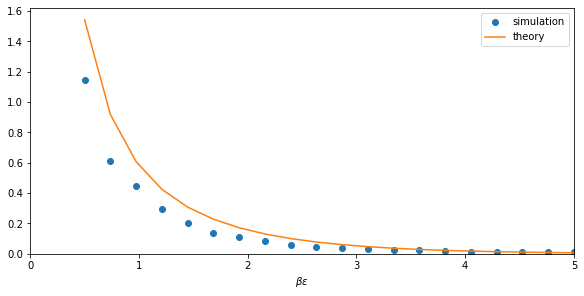

In [6]:
import numpy as np
from numpy import exp
from numpy.random import rand


def photon_gas_monte_carlo(initial_energy: float, cycles: int, beta: float) -> float:
    """
    Run a NVT MC simulation of the photon gas.
    Return the average energy.
    """
    average_energy = initial_energy
    for _ in range(cycles):
        # trial move +-1
        if rand() < 0.5:
            trial_energy = initial_energy + 1
        else:
            trial_energy = initial_energy - 1
        # Metropolis acceptance criterion
        if trial_energy>=0 and rand() < exp(-beta * (trial_energy - initial_energy)):
            initial_energy = trial_energy
            # Update the average energy,wrong 
            average_energy += initial_energy    
    return average_energy/cycles


def main():
    import matplotlib.pyplot as plt

    initial_energy = 10
    monte_carlo_cycles = 10000
    
    beta_min, beta_max = 0.5, 5.0
    betas = np.linspace(beta_min, beta_max, 20)
    average_energies = np.zeros_like(betas)

    for (i, beta) in enumerate(betas):
        average_energies[i] = photon_gas_monte_carlo(initial_energy, cycles=monte_carlo_cycles, beta=beta)

    fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
    ax.set_xlabel(r"$\beta\epsilon$")
    ax.plot(betas, average_energies, 'o', label="simulation")

    # Theoretical prediction
    theoretical_energies = 1/(exp(betas) - 1)
    ax.plot(betas, theoretical_energies, label="theory")
    
    ax.set_xlim(0, beta_max)
    ax.set_ylim(0, None)
    ax.legend()
    plt.show()


if __name__ == "__main__":
    main()

the larger acceptance, the less the error. so for small beta the error is larger. small beta cause less acceptance, so the error is larger.

5. Calculate and plot the distribution of $n_{j}$.
Compare this distribution with the analytical distribution.

<Figure size 1800x1200 with 0 Axes>

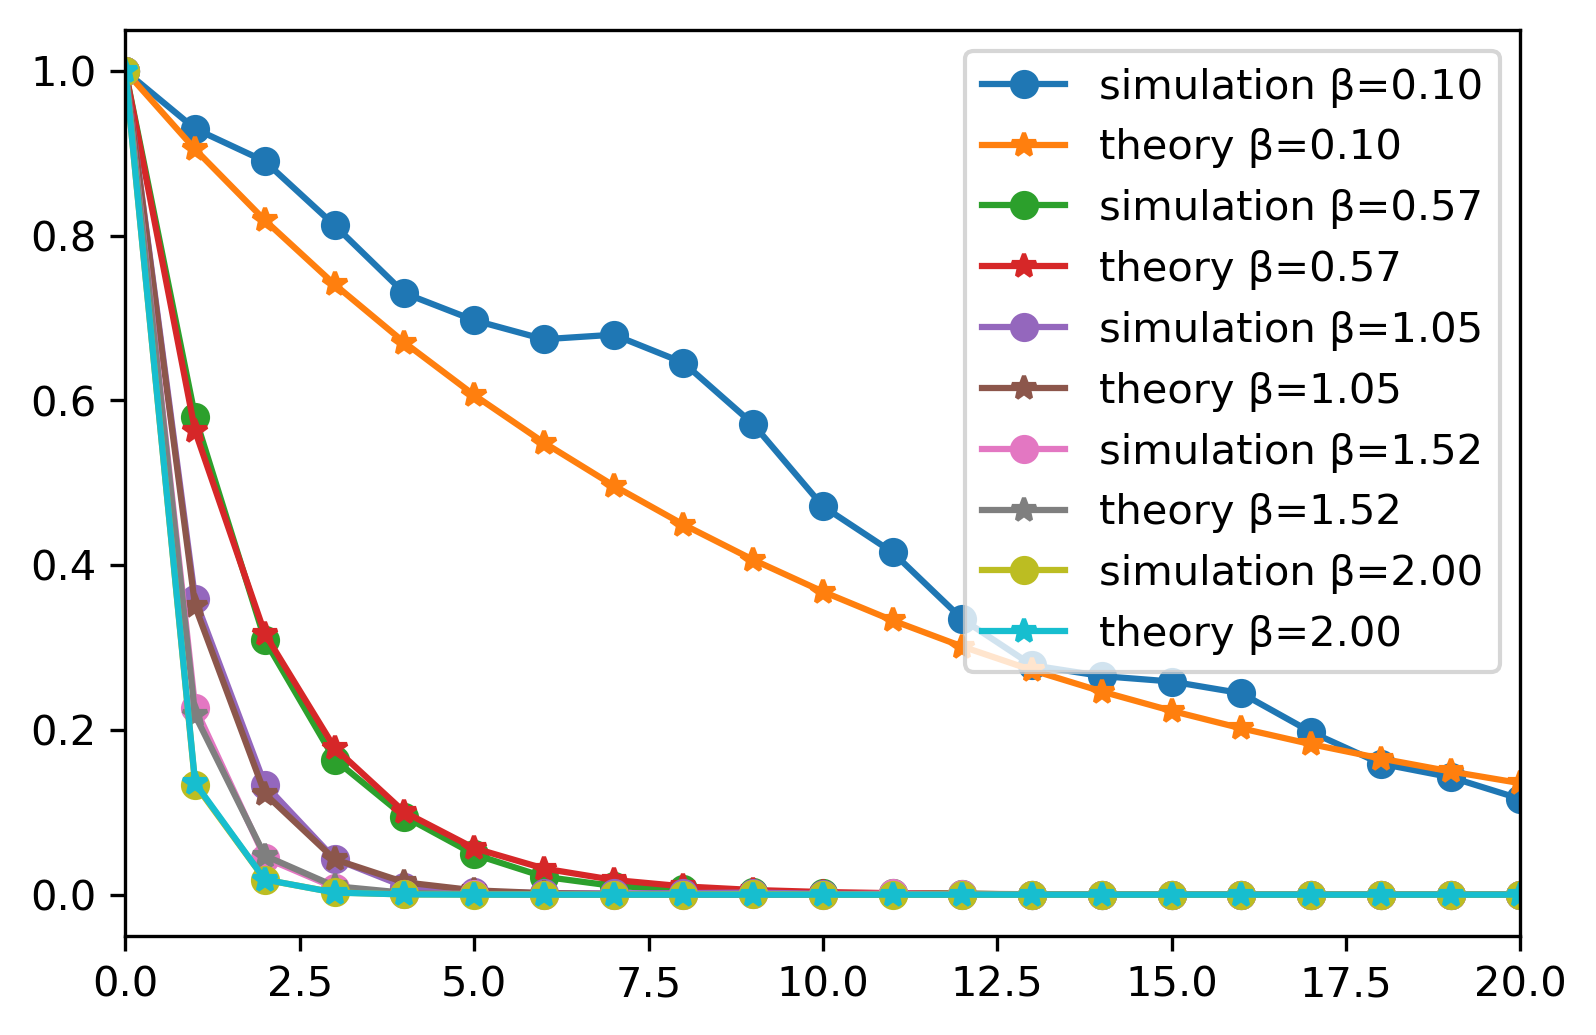

In [7]:
import numpy as np
from numpy import exp
from numpy.random import rand

def photon_gas_monte_carlo(initial_energy: float, cycles: int, beta: float) -> np.ndarray:
    """
    Run a NVT MC simulation of the photon gas.
    Return the entire sample of energy values.
    """
    sample_energy = np.zeros(cycles)
    for i in range(cycles):
        # trial move +-1
        if rand() < 0.5:
            trial_energy = initial_energy + 1
        else:
            trial_energy = initial_energy - 1
        # Metropolis acceptance criterion
        if trial_energy>=0 and rand() < exp(-beta * (trial_energy - initial_energy)):
            initial_energy = trial_energy
        # Store the current energy
        sample_energy[i] = initial_energy   
    return sample_energy


def main():
    import matplotlib.pyplot as plt
    # set plot resolution
    plt.rcParams['figure.dpi'] = 300

    initial_energy = 10
    monte_carlo_cycles = 10000
    
    beta_min, beta_max = 0.1, 2.0
    betas = np.linspace(beta_min, beta_max, 5)  # 减少beta值的数量以使图表更清晰
    plt.figure(1)
    plt.figure(2)
    
    max_energy = 30  # 设置最大能量值用于直方图和理论曲线
    energy_values = np.arange(0, max_energy)  # 整数能量值
    
    for (i, beta) in enumerate(betas):
        # 进行蒙特卡洛模拟
        samples = photon_gas_monte_carlo(initial_energy, cycles=monte_carlo_cycles, beta=beta)
        
        # 使用整数bin计算直方图
        hist_range = (0, max_energy)
        counts, edges = np.histogram(samples, bins=max_energy, range=hist_range)
        
        # 归一化直方图（使总概率为1）
        normalized_counts = counts / np.max(counts  )
        
        # 理论分布：玻色-爱因斯坦分布
        # 对于光子气体，概率正比于 exp(-beta*E)/(1-exp(-beta*E))
        # 需要归一化使总概率为1
        theoretical_dist = np.zeros(max_energy)
        for e in range(max_energy):
            if beta*e < 700:  # 防止数值溢出
                theoretical_dist[e] = exp(-beta*e)
        
        # 归一化理论分布
        if np.sum(theoretical_dist) > 0:
            theoretical_dist = theoretical_dist / np.max(theoretical_dist)
        
        # 绘制模拟结果和理论曲线
        plt.figure(2)
        plt.plot(energy_values, normalized_counts, 'o-', 
              label=f"simulation β={beta:.2f}")
        plt.plot(energy_values, theoretical_dist, '*-', 
               label=f"theory β={beta:.2f}")
    
    plt.xlim(0, 20)  # 限制x轴范围，使图表更清晰
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()